## Regression with BIWI head pose dataset

This is a more advanced example to show how to create custom datasets and do regression with images. Our task is to find the center of the head in each image. The data comes from the [BIWI head pose dataset](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db), thanks to Gabriele Fanelli et al. We have converted the images to jpeg format, so you should download the converted dataset from [this link](https://s3.amazonaws.com/fast-ai-imagelocal/biwi_head_pose.tgz).

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
 !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [43]:
!pip list |grep fast*

fastai                   1.0.53               
fastcache                1.1.0                
fastdtw                  0.3.2                
fastprogress             0.1.21               
fastrlock                0.4                  


In [0]:
from fastai.vision import *
import pandas as pd
import numpy as np

In [7]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [5]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'Colab Notebooks/'
print(base_dir)
path = Path(base_dir + 'GazeDeep/eyetrack_eyes_3')
print(path)

/content/gdrive/My Drive/Colab Notebooks/
/content/gdrive/My Drive/Colab Notebooks/GazeDeep/eyetrack_eyes_3


## Getting and converting the data

In [0]:
x = path.glob("*(*")
for i in x:
  print(str(i))
  #os.remove(str(i))

In [0]:
path

PosixPath('/content/gdrive/My Drive/Colab Notebooks/eyetrack_eyes')

In [0]:
!pwd
!ls "/content/gdrive/My Drive/Colab Notebooks/eyetrack"


/content
ls: cannot access '/content/gdrive/My Drive/Colab Notebooks/eyetrack': No such file or directory


In [8]:
fname = 'frame126.jpg'
coordfile = path/'coords.csv'
coords = pd.read_csv(coordfile, dtype = float)
coords.head()


,frame,width,height,time
0,0.0,30.0,30.0,0.280029
1,1.0,60.0,60.0,0.339014
2,2.0,90.0,90.0,0.406567
3,3.0,120.0,120.0,0.455404
4,4.0,150.0,150.0,0.517072


In [9]:
coords.tail()

,frame,width,height,time
4981,4981.0,377.0,304.0,299.737096
4982,4982.0,398.0,325.0,299.802789
4983,4983.0,419.0,346.0,299.872856
4984,4984.0,441.0,367.0,299.963207
4985,4985.0,462.0,388.0,300.032676


In [14]:
def img2coord(f): 
    #print(f)
    f=f.name
    frame = int(f[5:-4])
    #print(frame)
    return coords.values[frame,1:3]
    #return coords.values[frame,1:3]
    
ctr = img2coord(path/fname)
ctr


array([185., 147.])

In [10]:
coords.values[3,1:3]
int(fname[5:-4])

126

In [11]:
pfname = path/fname
f = (pfname).name
frame = (f[5:-4])
d= int(frame[-1])

lal = int(f[5:-4][-1])
print(pfname)
print(f)

print(frame)
print(lal)


/content/gdrive/My Drive/Colab Notebooks/GazeDeep/eyetrack_eyes_3/frame126.jpg
frame126.jpg
126
6


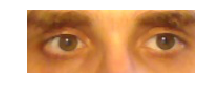

In [12]:
img = open_image(path/fname)
img.show()

In [15]:
fname ='frame126.jpg'
img2coord(path/fname)

array([185., 147.])

In [0]:
np.random.random()

0.6766355096837487

In [16]:
int((path/fname).name[5:-4][-1])==3
#np.random.random()<.2

False

## Creating a dataset

In [0]:
data = (ImageList.from_folder(path)
        .split_by_valid_func(lambda o: np.random.random()<.2)
        .label_from_func(img2coord, label_cls= FloatList)        
        .databunch().normalize(imagenet_stats)
       )

#.transform(get_transforms(), tfm_y=True, size=(120,160))   
#.split_by_valid_func(lambda o: int(o.name[5:-4][-1])==3)

In [18]:
data

ImageDataBunch;

Train: LabelList (3974 items)
x: ImageList
Image (3, 60, 160),Image (3, 60, 160),Image (3, 60, 160),Image (3, 60, 160),Image (3, 60, 160)
y: FloatList
[397. 524.],[1097.  505.],[973. 451.],[1018.  840.],[80. 36.]
Path: /content/gdrive/My Drive/Colab Notebooks/GazeDeep/eyetrack_eyes_3;

Valid: LabelList (1012 items)
x: ImageList
Image (3, 60, 160),Image (3, 60, 160),Image (3, 60, 160),Image (3, 60, 160),Image (3, 60, 160)
y: FloatList
[650. 734.],[583. 520.],[1120.  286.],[796. 539.],[155. 106.]
Path: /content/gdrive/My Drive/Colab Notebooks/GazeDeep/eyetrack_eyes_3;

Test: None

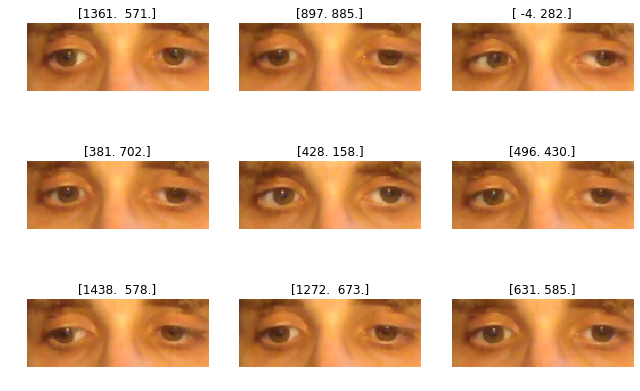

In [19]:
data.show_batch(3, figsize=(9,6))

## Train model

In [20]:
learn = cnn_learner(data, models.resnet34)
#must define here correct metric that defines average distance from target 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 92620561.29it/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


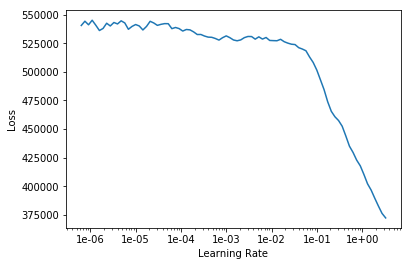

In [21]:
learn.lr_find()
learn.recorder.plot()

In [25]:
learn.recorder.lrs

[1e-07,
 1.202264434617413e-07,
 1.4454397707459274e-07,
 1.7378008287493754e-07,
 2.0892961308540395e-07,
 2.51188643150958e-07,
 3.019951720402016e-07,
 3.6307805477010137e-07,
 4.36515832240166e-07,
 5.248074602497725e-07,
 6.309573444801933e-07,
 7.585775750291837e-07,
 9.120108393559096e-07,
 1.096478196143185e-06,
 1.3182567385564074e-06,
 1.5848931924611132e-06,
 1.9054607179632473e-06,
 2.2908676527677735e-06,
 2.754228703338166e-06,
 3.311311214825911e-06,
 3.981071705534973e-06,
 4.7863009232263826e-06,
 5.754399373371569e-06,
 6.918309709189365e-06,
 8.317637711026708e-06,
 9.999999999999999e-06,
 1.202264434617413e-05,
 1.4454397707459279e-05,
 1.737800828749376e-05,
 2.0892961308540385e-05,
 2.5118864315095795e-05,
 3.019951720402016e-05,
 3.630780547701014e-05,
 4.365158322401661e-05,
 5.248074602497728e-05,
 6.309573444801929e-05,
 7.585775750291836e-05,
 9.120108393559096e-05,
 0.00010964781961431851,
 0.00013182567385564074,
 0.0001584893192461114,
 0.00019054607179632

In [27]:
lr = 5e-1
lr

0.5

In [36]:
slice(1e-1,1e-0)

slice(0.1, 1.0, None)

In [37]:
learn.fit_one_cycle(8, slice(1e-1,1e-0))

epoch,train_loss,valid_loss,time
0,109771.773438,189378.984375,02:28
1,44054.964844,429067.562500,00:12
2,36558.945312,160722.953125,00:12
3,31408.884766,69038.914062,00:12
4,27928.957031,50004.355469,00:12
5,20799.171875,1304955264.000000,00:12
6,15482.420898,9796.349609,00:12
7,12985.274414,6995.765625,00:12


In [0]:
learn.save('stage-1')

In [0]:
learn.export()

In [40]:
learn.validate()

[6995.7656]

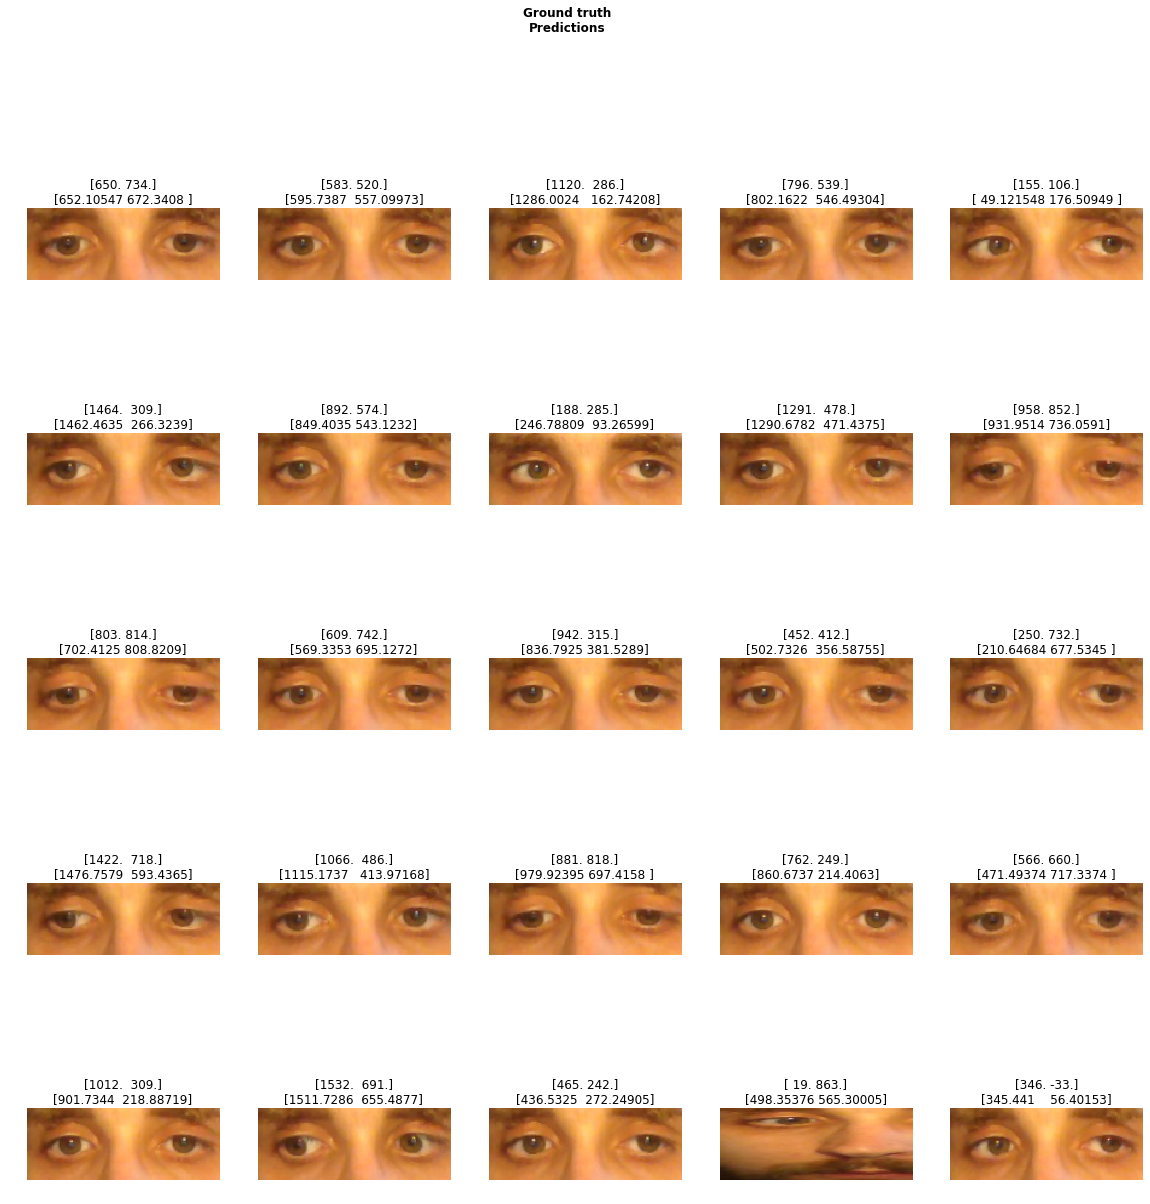

In [41]:
learn.show_results()

## Data augmentation

In [0]:
tfms = get_transforms(max_rotate=20, max_zoom=1.5, max_lighting=0.5, max_warp=0.4, p_affine=1., p_lighting=1.)

data = (PointsItemList.from_folder(path)
        .split_by_valid_func(lambda o: o.parent.name=='13')
        .label_from_func(get_ctr)
        .transform(tfms, tfm_y=True, size=(120,160))
        .databunch().normalize(imagenet_stats)
       )

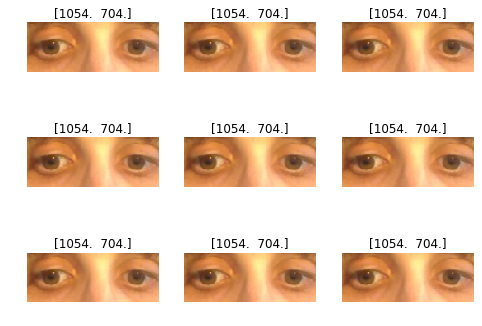

In [0]:
def _plot(i,j,ax):
    x,y = data.train_ds[0]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(8,6))